# Ciencia de datos con R: Fundamentos Estadísticos

## Seminario Elemental de Estadística con R

---

# Guía 7: Predicciones

---

### Alumno: Leandro Carreira
### LU: 669/18

Seed: 66918

### Tercera Entrega de TP: Martes 12 de Mayo (vence 23:59 hs.)

>**a)** Ejercicio 16 de la Guía TP 7 resuelto para valores de h=0.5, 1 y 5
>
>**b)** Script del Ejercicio 18
>
>**c)** En a lo sumo 8 líneas, descripción de alguna situación relacionada a su campo de trabajo donde pueda ser importante predecir cierta variable respuesta con una (o varias) variables explicativas, contando el problema y el marco teórico.

### a)
> 16. Graficar la función `predigo_altura_masculino`, con $h=0.5$, $h=1$ y $h=5$, evaluándola a lo largo de  una una grilla sobre un intervalo que cubra todas las alturas observadas en las madres.

In [12]:
library(ggplot2)
# Datos a usar
data <- read.csv('./alturas_n_500.csv')
data.M <- data[data$genero == 'M',]

In [32]:
head(data.M)

,altura,genero,contextura_madre,altura_madre
1,169.9,M,mediana,160.5
4,172.8,M,mediana,161.7
6,169.7,M,mediana,162.0
8,172.0,M,bajita,153.8
10,171.2,M,bajita,154.7
11,174.5,M,alta,162.6


In [13]:
predigo_altura_masculino <- function(altura, altura_madre, 
                                     altura_mama_nueva, h){
    min_altura <- altura_mama_nueva - h
    max_altura <- altura_mama_nueva + h
    relevantes <- altura[altura_madre > min_altura & altura_madre < max_altura]
    pred <- mean(relevantes)
    return(pred)
}

In [38]:
# 16. Grilla de ventanas. 
# Uso de extremos max/min altura_madre.
# Notar que el promedio en los extremos será sesgado hacia "el centro"
hs <- c(0.5, 1.0, 5.0, 20.0)
min_altura <- min(data.M$altura_madre)
max_altura <- max(data.M$altura_madre)
grilla <- seq(min_altura, max_altura, by=0.1)

m <- length(grilla)
preds <- data.frame(h05=rep(0,m),
                    h1=rep(0,m),
                    h5=rep(0,m),
                    h20=rep(0,m))
for(i in 1:m){
    altura_mama <- grilla[i]
    for(j in 1:length(hs)){
        h <- hs[j]
        preds[i, j] <- predigo_altura_masculino(data.M$altura, data.M$altura_madre, altura_mama, h)
    }
}

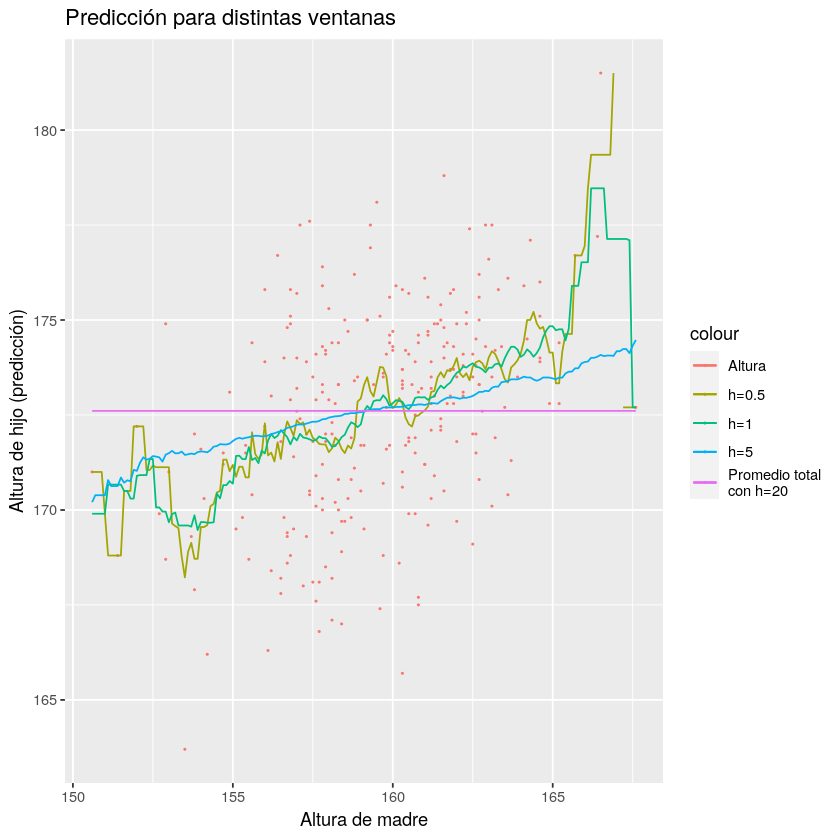

In [50]:
library(ggplot2)
ggplot() + 
    geom_point(data=data.M, aes(x=altura_madre, y=altura, col="Altura"), size=0.2)+
    geom_line(data=preds, aes(x=grilla, y=h05, col="h=0.5")) +
    geom_line(data=preds, aes(x=grilla, y=h1, col="h=1")) +
    geom_line(data=preds, aes(x=grilla, y=h5, col="h=5")) +
    geom_line(data=preds, aes(x=grilla, y=h20, col="Promedio total\ncon h=20")) +
    ggtitle("Predicción para distintas ventanas") +
    labs(x = "Altura de madre", y="Altura de hijo (predicción)")

Observar cómo **a medida que agrandamos la ventana, las predicciones son menos ruidosas, pero más imprecisas** si nos restringimos a valores cercanos, comenzando con una gran variabilidad para un h pequeño, y tendiendo al promedio total para un h muy grande (representado con h=20, que abarca la mayor diferencia posible entre alturas de madres).

A partir de lo observado, puede decirse que

* un **h grande se ajusta pobremente a los datos actuales**, pero **generaliza bien a los no observados** (llevándolo al extremo: ***underfitting***).

* un **h pequeño se ajusta muy bien a los datos actuales**, pero **generaliza muy pobremente a nuevos datos** (llevándolo al extremo: ***overfitting***).

### b)
> 18. Implemente una función que tenga por input un conjunto de valores de X, sus correspondientes valores de Y, un nuevo valor x donde queremos predecir, y el tamaño h de laventana que vamos a utilizar a la hora de hacer promedios moviles: `predigoVentana(X, Y, xNuevo, h)`

In [11]:
predigoVentana <- function(X, Y, xNuevo, h){
    min_x <- xNuevo - h
    max_x <- xNuevo + h
    relevantes <- altura[X > min_x & X < max_x]
    pred <- mean(relevantes)
    return(pred)
}

### c)

Mi campo de trabajo actual es el uso de [**Aprendizaje por Refuerzo (*RL*)**](https://en.wikipedia.org/wiki/Reinforcement_learning) para la predicción en toma de decisiones.

No puedo comentar los detalles por un tema de confidencialidad con la empresa, pero puedo describir el problema general $[*]$.

$[*]$ **Observación:** Tal vez lo que escriba sea buscar morderse la cola con respecto al objetivo del ejercicio, pues RL se trata justamente de **predecir variables a partir de observaciones** (aunque con sus particularidades). Si creen que este es el caso, puedo reescribirlo con alguna otra aplicación tipo hobbie, actividad, idea, etc.

El problema a resolver es el siguiente:

Existe una **interacción** entre un **algoritmo (*agente*)** y un **entorno (*environment*)**.

El agente **observa estados (*states*) del entorno** en que se encuentra, y a partir de ellos, debe **decidir qué decisión (*acción*) tomar**, y al hacerlo, recibe una **recompensa (*reward*)**.

La diferencia con el problema resuelto en los ejercicios anteriores, es que **los datos se reciben uno a uno, a medida que el agente interactúa con el *environment* en que se encuentra, toma nuevas decisiones, y recibe nuevos datos** (que **dependen** de sus acciones en esos estados particulares).

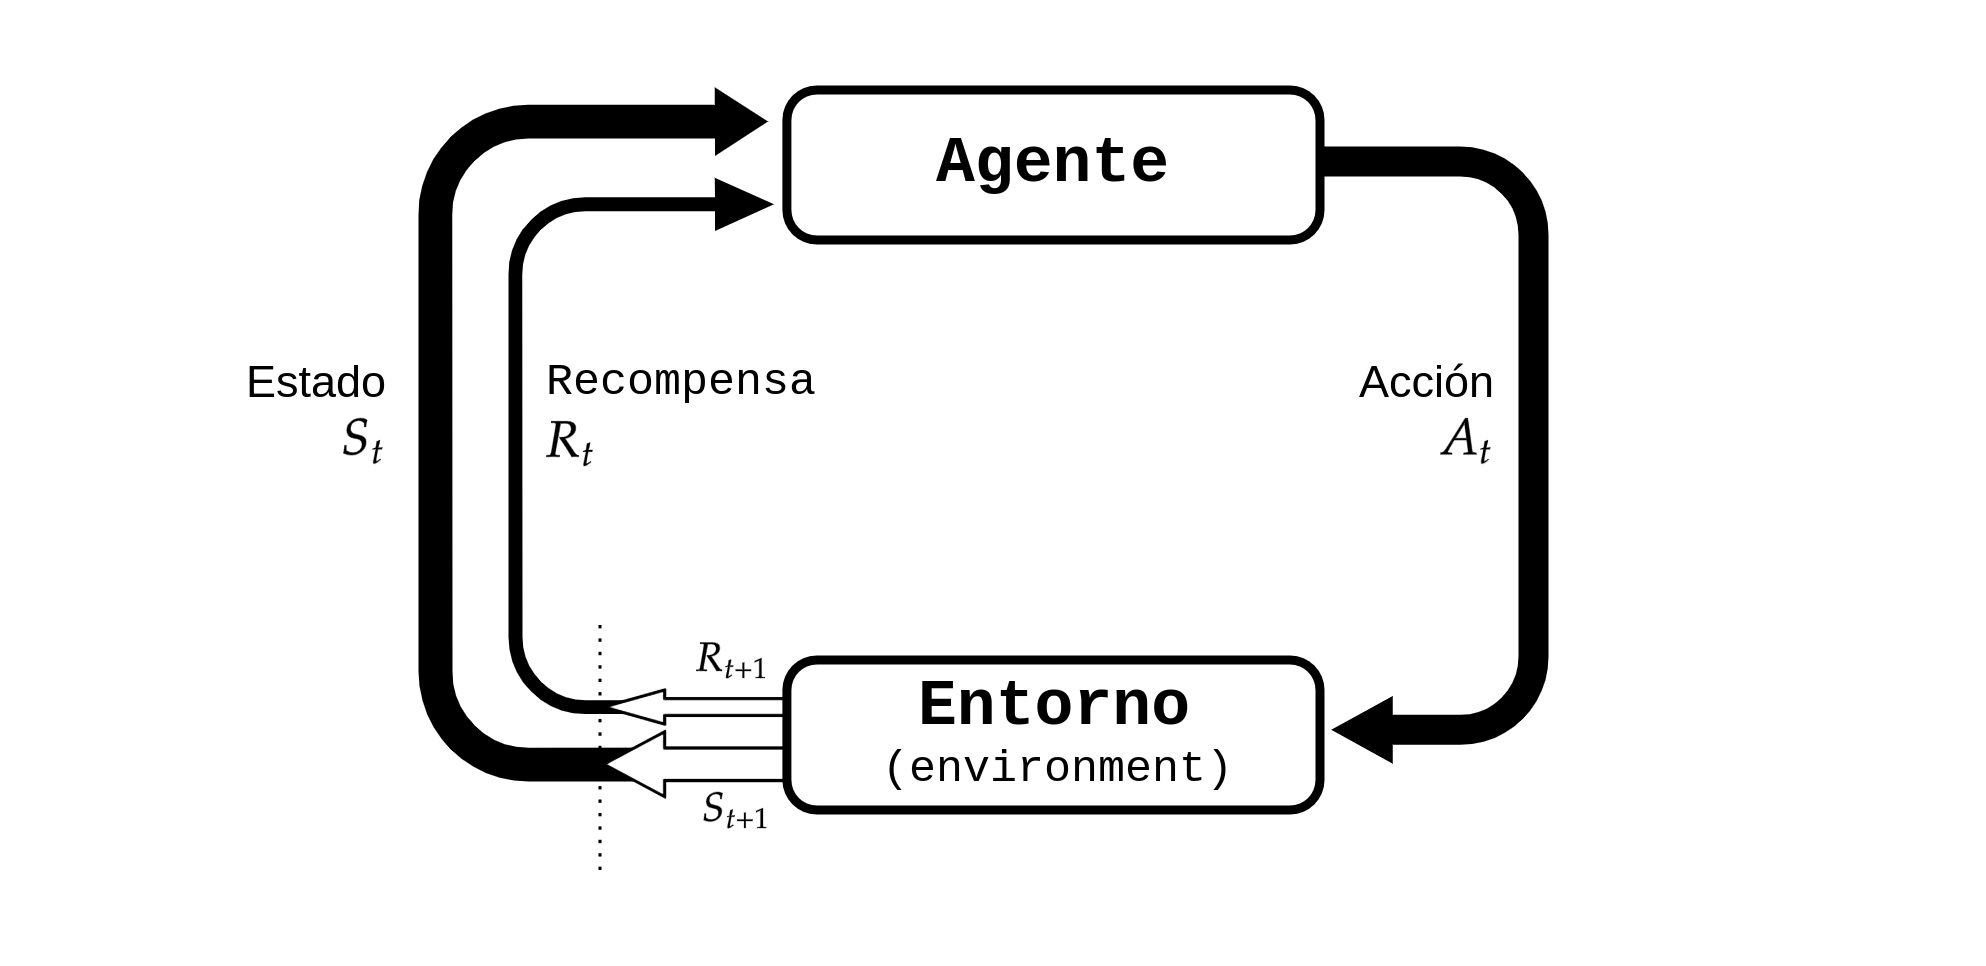

$$\text{Diagrama RL}$$

De esta forma, el "aprendizaje" se da de manera contínua a medida que se reciben nuevos datos.

La dificultad del problema es que tomar **malas decisiones**, resulta en **datos malos**, de los cuales **no** es posible aprender **buenas estrategias**, y por lo tanto, **el aprendizaje es nulo, inútil o muy lento**.

Para eso se introducen valores que **califican** cada estado y cada acción, de forma que los *estados-acción* con puntajes altos sean preferibles frente a otros con bajos puntajes.

También se introduce el concepto de ***exploración***, en el cual con una baja probabilidad, la acción a tomar es aleatoria, promoviendo la exploración del espacio de estados total (y no solo repetir buenas acciones e ignorar las malas, previamente tomadas).

Todo esto se construye sobre la base teórica de las [ecuaciones de Bellman](https://en.wikipedia.org/wiki/Bellman_equation), en combinación con regresión lineal, y más recientemente con redes neuronales y aprendizaje profundo.


### Más concreto

Una aplicación más concreta de **predecir variables a partir de features** para este problema, es la **búsqueda de mejores hiperparámetros en cada caso particular**, mediante el uso de gridsearch y búsqueda aleatoria, o con modelos más sofisticados como árboles de decisión, procesos gaussianos, etc.

En este caso **las variables a predecir serán cada uno de los hiperparámetros**, y **las variables observadas a partir de las cuales predecir, algún puntaje promedio para una N cantidad de episodios simulados**.